## Lý thuyết về mạng CNN


<img src="./images/CNN_1.jpg" width="80%"/>

## 1.Convolution layer

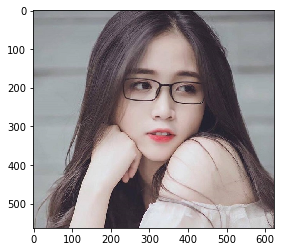

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

X = np.array(Image.open('./images/girl.jpg'))
plt.imshow(X)

In [2]:
print("ảnh màu kích thước:", X.shape)

ảnh màu kích thước: (563, 624, 3)


Chuyển ảnh màu sang ảnh đen trắng (ảnh xám)

In [3]:
X = X.dot([0.299, 0.5870, 0.111])

kích thước mới: (563, 624)


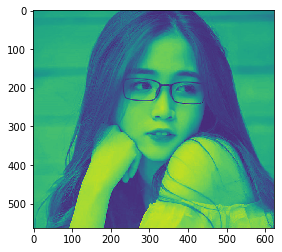

In [4]:
print("kích thước mới:",X.shape)
plt.imshow(X)

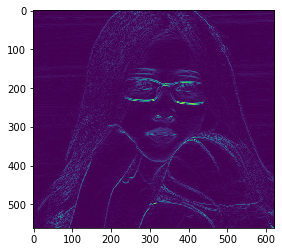

In [5]:
# tạo bộ lọc nang F1
F1 = np.array([[-1, -1, -1],
              [0, 0, 0],
              [1, 1, 1]])

# Tính tích chập 2 chiều
def conv2d(X, F, s = 1, p = 0):
    """
    X: ma trận đầu vào
    F: ma trận bộ lọc
    s: Bước sải
    p: padding
    """
    (w1, h1) = X.shape
    f = F.shape[0]
    w2 = int((w1 + 2 * p - f)/s) + 1
    h2 = int((h1 + 2 * p - f)/s) + 1
    Y = np.zeros((w2, h2))
    X_pad = np.pad(X, pad_width = p, mode = 'constant', constant_values = 0)
    for i in range(w2):
        for j in range(h2):
            idw = i*s
            idh = j*s
            Y[i,j] = np.abs(np.sum(X_pad[idw:(idw+f), idh:(idh+f)] * F))
    return Y

Y1 = conv2d(X, F1)
plt.imshow(Y1)

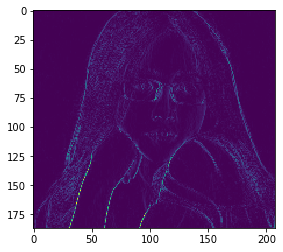

In [6]:
F2 = np.array([[1, 0, -1],
             [1, 0, -1],
             [1, 0, -1]])
Y2 = conv2d(X, F2, s = 3, p = 0)
plt.imshow(Y2)

Ta nhận thấy bọ lọc ngang lọc ra các đường ngang trong ảnh tốt, còn bộ lọc dọc lại lọc ra các đường dọc. Từ đó, ta thấy rằng bộ lọc có vai trò quan trọng trong trích xuất thông tin ảnh. Việc tìm ra bộ lọc tương ứng với các bài toán chính là việc tìm ra các tham số cho mô hình mạng CNN.

## 1.2 Pooling

## 1.3 Flatten

## Áp dụng CNN cho bài toán MNITS với Keras

In [8]:
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ảnh đen trắng nên cần thiết lập chiều cuối là 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')

# Chuẩn hoá dữ liệu về khoảng 0 đến 1 để xử lý tốt hơn
x_train /= 255

# print(y_train.shape) # (60000,)

# chuyển y về dạng one-hot vector
y_train = np_utils.to_categorical(y_train, 10)

In [10]:
print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
model = Sequential()

# 32 ma trận lọc với kích cỡ là (5,5), tức là lấy 32 feature ảnh
# --> giảm ảnh xuống (24,24,1)
# Ta thêm padding = 'Same' để đưa kích cỡ về (28,28,1) như ban đầu
# Sử dụng Relu là hàm activation
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)        

In [12]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.save('model.h5')


Epoch 1/5
60000/60000 [==============================] - 319s 5ms/step - loss: 0.1555 - accuracy: 0.9526
Epoch 2/5
60000/60000 [==============================] - 355s 6ms/step - loss: 0.0674 - accuracy: 0.9814
Epoch 3/5
60000/60000 [==============================] - 315s 5ms/step - loss: 0.0599 - accuracy: 0.9836
Epoch 4/5
60000/60000 [==============================] - 321s 5ms/step - loss: 0.0629 - accuracy: 0.9831
Epoch 5/5
60000/60000 [==============================] - 320s 5ms/step - loss: 0.0653 - accuracy: 0.9829
